In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
store = pd.read_csv('Data/store.csv')
train_1 = pd.read_csv('Data/train_1.csv')
train_2 = pd.read_csv('Data/train_2.csv')
train = pd.concat([train_1, train_2], axis=0)
train= train.drop(columns=['Unnamed: 0']).reset_index(drop = 0)

print('store : ',store.shape)
print('train : ',train.shape)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


store :  (1115, 10)
train :  (1017209, 10)


Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. 
Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [3]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [5]:
store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [6]:
train.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263,555,1,1,0,1
1,1,2,5,2015-07-31,6064,625,1,1,0,1
2,2,3,5,2015-07-31,8314,821,1,1,0,1
3,3,4,5,2015-07-31,13995,1498,1,1,0,1
4,4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   index          1017209 non-null  int64 
 1   Store          1017209 non-null  int64 
 2   DayOfWeek      1017209 non-null  int64 
 3   Date           1017209 non-null  object
 4   Sales          1017209 non-null  int64 
 5   Customers      1017209 non-null  int64 
 6   Open           1017209 non-null  int64 
 7   Promo          1017209 non-null  int64 
 8   StateHoliday   1017209 non-null  object
 9   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 77.6+ MB


In [8]:
train.nunique()

index            508605
Store              1115
DayOfWeek             7
Date                942
Sales             21734
Customers          4086
Open                  2
Promo                 2
StateHoliday          5
SchoolHoliday         2
dtype: int64

In [9]:
train["Date"] = pd.to_datetime(train["Date"], format="%Y-%m-%d")
print(type(train["Date"][0]))
print(train["Date"][0])
print(train["Date"][0].weekday())
#display(dir(train["Date"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2015-07-31 00:00:00
4


In [10]:
date = pd.Timestamp(year=2015, month=8, day=30)
date<train["Date"][0]

False

In [11]:
df = store.loc[
    (~store["CompetitionOpenSinceMonth"].isna()) & (train["Open"] == 1),
    ["Store","StoreType", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "CompetitionDistance"]
    ].reset_index(drop=True)

In [12]:
df["CompetitionOpenSinceMonth"] = df["CompetitionOpenSinceMonth"].astype("int")
df["CompetitionOpenSinceYear"] = df["CompetitionOpenSinceYear"].astype("int")
df["DateStartComp"] = df.apply(
    lambda row: pd.Timestamp(
        year = row["CompetitionOpenSinceYear"],
        month = row["CompetitionOpenSinceMonth"],
        day = 1),
    axis=1)
df.drop(columns = ["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"], inplace = True)
df

,Store,StoreType,CompetitionDistance,DateStartComp
0,1,c,1270.0,2008-09-01
1,2,a,570.0,2007-11-01
2,3,a,14130.0,2006-12-01
3,4,c,620.0,2009-09-01
4,5,a,29910.0,2015-04-01
...,...,...,...,...
754,1108,a,540.0,2004-04-01
755,1109,c,3490.0,2011-04-01
756,1110,c,900.0,2010-09-01
757,1111,a,1900.0,2014-06-01


In [13]:
df = df.loc[(df["DateStartComp"] > train["Date"].min()) & (df["DateStartComp"] < train["Date"].max())].reset_index()
df

,index,Store,StoreType,CompetitionDistance,DateStartComp
0,4,5,a,29910.0,2015-04-01
1,5,6,a,310.0,2013-12-01
2,6,7,a,24000.0,2013-04-01
3,7,8,a,7520.0,2014-10-01
4,11,14,a,1300.0,2014-03-01
...,...,...,...,...,...
183,735,1085,c,4030.0,2015-02-01
184,736,1086,a,180.0,2013-11-01
185,742,1094,d,2380.0,2013-03-01
186,746,1099,a,200.0,2013-04-01


In [14]:
df.columns

Index(['index', 'Store', 'StoreType', 'CompetitionDistance', 'DateStartComp'], dtype='object')

In [15]:
df["moySalesBeforeComp"] = df.apply(
    lambda row: np.mean(train.loc[(train["Store"] == row["Store"]) & (train["Date"] < row["DateStartComp"]),"Sales"]),
    axis = 1
) 

In [16]:
df["moySalesAfterComp"] = df.apply(
    lambda row: np.mean(train.loc[(train["Store"] == row["Store"]) & (train["Date"] >= row["DateStartComp"]),"Sales"]),
    axis = 1
) 

In [17]:
df["deltaSalesComp"] = df["moySalesBeforeComp"] - df["moySalesAfterComp"]

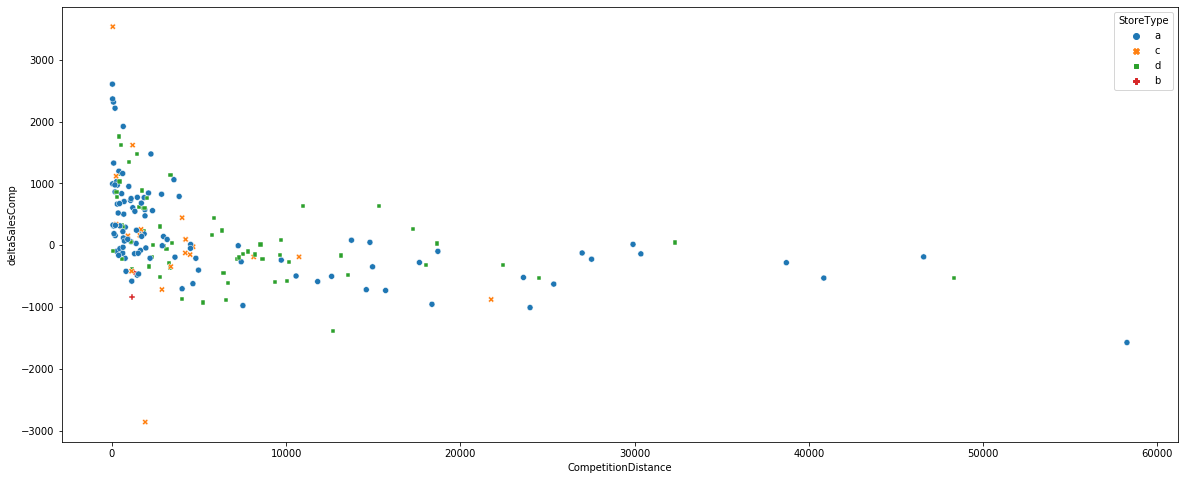

In [18]:
plt.figure(figsize=(20,8))

sns.scatterplot(
    data = df,
    hue = "StoreType",
    x = "CompetitionDistance",
    y = "deltaSalesComp",
    style = "StoreType",
    legend = "full",
)

In [21]:
df[df['CompetitionDistance'] < 10000]["deltaSalesComp"] .mean()

290.46376979787334

In [22]:
df["moySalesBeforeComp"].mean()

6169.617864885009

In [24]:
(df["moySalesAfterComp"].mean() - df["moySalesBeforeComp"].mean()) / df["moySalesBeforeComp"].mean() * 100

-2.56056558308859

In [25]:
df_ = df[df['CompetitionDistance'] < 10000]
(df_["moySalesAfterComp"].mean() - df_["moySalesBeforeComp"].mean()) / df_["moySalesBeforeComp"].mean() * 100

-4.611033389463694

<Figure size 1440x576 with 0 Axes>

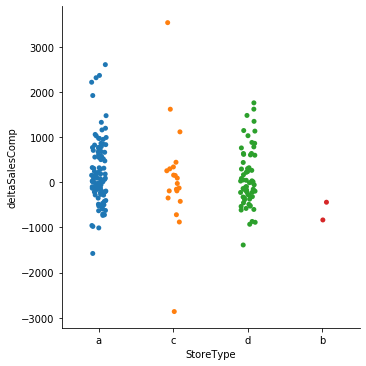

In [19]:
plt.figure(figsize=(20,8))

sns.catplot(
    data = df,
    x = "StoreType",
    y = "deltaSalesComp",
)